In [0]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# import the regressor 
from sklearn.tree import DecisionTreeRegressor 

## Decision Tree Regression

Using a decision tree regressor to predict the maximum temperature in Seattle of 2016. 

- Features:
 - year: 2016 for all data points
 - month: number for month of the year
 - day: number for day of the year
 - week: day of the week as a character string
 - temp_2: max temperature 2 days prior
 - temp_1: max temperature 1 day prior
 - average: historical average max temperature
 - actual: max temperature measurement

Target Variable:
- actual: max temperature measurement

In [0]:
temp = pd.read_csv('temps.csv')
temp = temp[['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual']] # extract relevant features
temp.head(5)

,year,month,day,week,temp_2,temp_1,average,actual
0,2016,1,1,Fri,45,45,45.6,45
1,2016,1,2,Sat,44,45,45.7,44
2,2016,1,3,Sun,45,44,45.8,41
3,2016,1,4,Mon,44,41,45.9,40
4,2016,1,5,Tues,41,40,46.0,44


In [0]:
# check for null values
temp.isnull().sum()

year       0
month      0
day        0
week       0
temp_2     0
temp_1     0
average    0
actual     0
dtype: int64

In [0]:
# Column week is categorical. Need use one hot encoding
temp = pd.get_dummies(temp)

In [0]:
temp.head()

,year,month,day,temp_2,temp_1,average,actual,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,0,0,0,0,0,1,0


In [0]:
# seperate the features and target columns
features = temp.drop('actual', axis=1).values
target = temp.iloc[:,6].values

In [0]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 42)

# Note standardization for Decision Trees and Random Forests are not required
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# A function to calculate bias
def my_bias(y_pred, y_test):
    y_pred = np.array(y_pred)
    y_test = np.array(y_test)
    average_ypred = np.mean(y_pred)
    average_ytest = np.mean(y_test)
    bia = np.power((average_ypred - average_ytest),2)
    return bia

In [0]:
# A function to calculate variance
def my_variance(y_pred):
    y_pred = np.array(y_pred)
    var = np.mean((y_pred - np.mean(y_pred))**2)
    return var

In [0]:
bias_DT = []
var_DT= []
loss_DT = []
max_depth = range(1,11)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 42)
for m in max_depth:
    DTregressor = DecisionTreeRegressor(max_depth = m)
    DTreg = DTregressor.fit(X_train, y_train) 
    y_pred = DTreg.predict(X_test)
    bias_DT= np.append(bias_DT, my_bias(y_pred,y_test))
    var_DT = np.append(var_DT, my_variance(y_pred))
    loss_DT = np.append(loss_DT, (mean_squared_error(y_test,y_pred)))

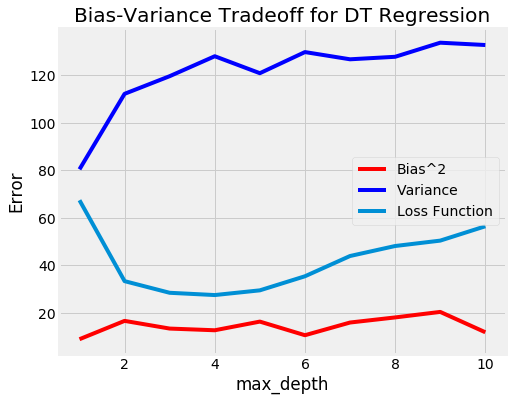

In [0]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
plt.plot(max_depth, bias_DT*10, color='r', label='Bias^2')
plt.plot(max_depth, var_DT, color='b', label='Variance')
plt.plot(max_depth, loss_DT, label='Loss Function')
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff for DT Regression')
plt.legend()

As tree depth increases, variance increases while bias remain relatively low.

In [0]:
# determining the accuracy of the optimal max_depth model (which corresponds to the lowest error)
index  = np.argmin(loss_DT)
DTregressor = DecisionTreeRegressor(max_depth = max_depth[index], random_state=0)
DTreg = DTregressor.fit(X_train, y_train) 

y_pred = DTreg.predict(X_test)
y_train_pred = DTreg.predict(X_train)

print("Training Accuracy Score =",DTreg.score(X_train, y_train)*100)
print("Test Accuracy Score =", DTreg.score(X_test, y_test)*100)

Training Accuracy Score = 87.05004808849655
Test Accuracy Score = 82.21854174025896


# Decision Tree Classification

### Loading Data
Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [0]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [0]:
pima = pima.iloc[1:]
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [0]:
X = X.values.astype(float)
y = y.values.astype(int)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
bias_DTclf = []
var_DTclf= []
loss_DTclf = []
max_depth =  np.arange(1,20, 1)
for m in max_depth:
    DTregressor = DecisionTreeClassifier(max_depth = m)
    DTclf = DTregressor.fit(X_train, y_train) 
    y_pred = DTclf.predict(X_test)
    bias_DTclf.append(my_bias(y_pred,y_test))
    var_DTclf.append(my_variance(y_pred))
    loss_DTclf.append(log_loss(y_test,y_pred))
    

In [0]:
df_DTclf = pd.DataFrame({'Bias':np.array(bias_DTclf), 'Variance':np.array(var_DTclf), 'loss': np.array(loss_DTclf)}, index = np.array(max_depth))

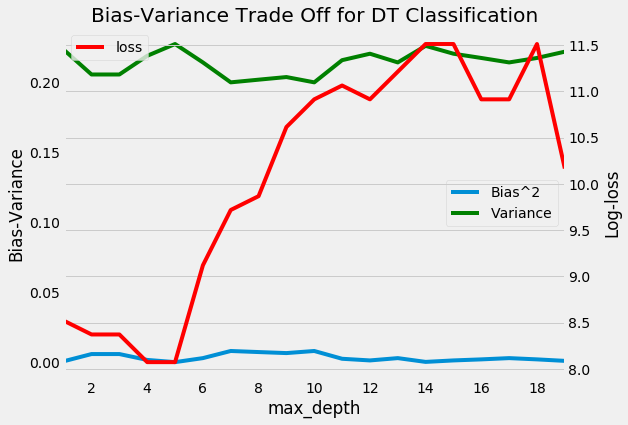

In [0]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = df_DTclf['Bias'].plot( label = 'Bias^2')
ax.set_ylabel("Bias")
ax.set_xlabel("max_depth")
ax.set_title("Bias-Variance Trade Off for DT Classification")
ax.legend(loc=1)


ax1 = df_DTclf['Variance'].plot(style='g', label='Variance')
ax1.set_ylabel("Bias-Variance")
ax1.legend(loc=2)

ax2 = df_DTclf['loss'].plot(secondary_y=True, style='r')
ax2.set_ylabel("Log-loss")
ax2.legend(loc=2)

plt.show()

Once again, bias remains low as there is a slight increase in variance

In [0]:
# determining the accuracy of the optimal max_depth model (which corresponds to the lowest error)
index  = np.argmin(loss_DTclf) # index of lowest error
DTregressor = DecisionTreeClassifier(max_depth = max_depth[index], random_state=0)
DTclf = DTregressor.fit(X_train, y_train) 

y_pred = DTclf.predict(X_test)
y_train_pred = DTclf.predict(X_train)

print("Training Accuracy Score =", accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy Score =", accuracy_score(y_test, y_pred)*100)

Training Accuracy Score = 80.44692737430168
Test Accuracy Score = 77.05627705627705


### Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

pip install graphviz

pip install pydotplus

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

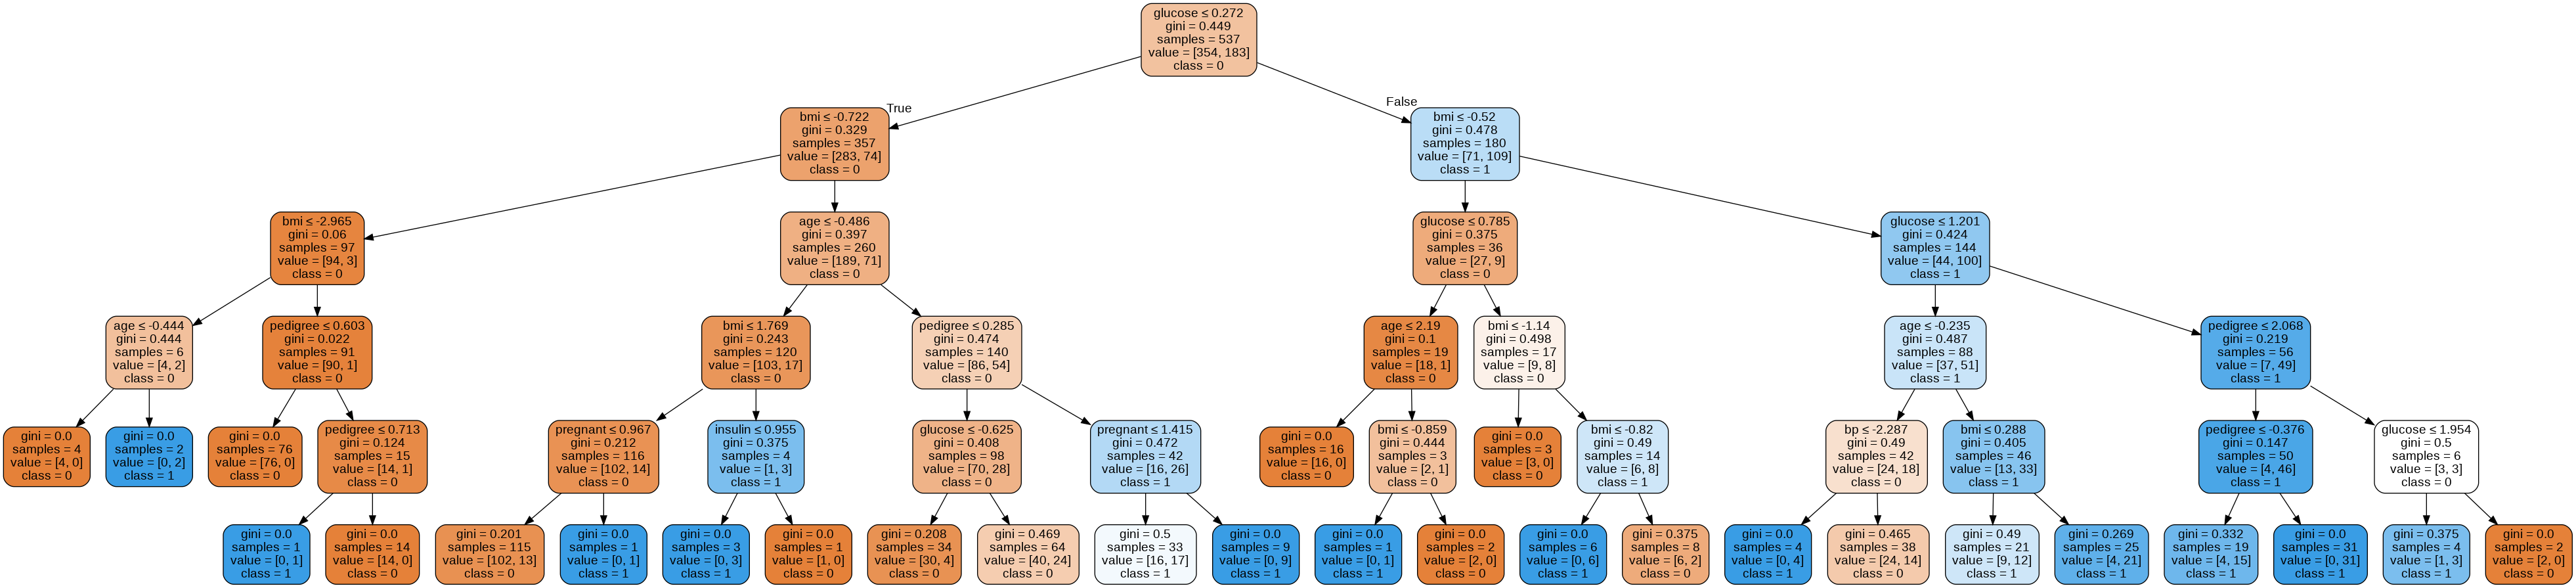

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(DTclf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Note: the data was standardized which is why variable numbers are small

In General, 

Pros
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

Cons
- Sensitive to noisy data. It can overfit noisy data.
-The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

# Random Forest For Regression

Let's know apply the temperature dataset from above on a random forest model.

Fit the training data on the random forest regressor. The n_estimators defines the number of trees in the random 
forest. Let's start with 20 trees and determine how accurate our model is. 

In [0]:
regressor = RandomForestRegressor(n_estimators=3, random_state=0)
regressor.fit(X_train, y_train) # note randomforestRegressor is expecting a 1d array for training y. Use ravel() if y_train is 2d.
y_pred = regressor.predict(X_test)

In [0]:
# Calculate MSE and MAE to evaluate the regression model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.30735930735930733
Mean Squared Error: 0.20153920153920155


Let's increase the number of trees in the random forest to 1000 

In [0]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

In [0]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.2981731601731602
Mean Squared Error: 0.14704458008658008


As you can see from above both the mean absolute error and the mean squared error decreased as we increased the number of trees in the random forest model from 3 to 1000. 

## Bias-Variance Trade off 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 42)
bias_avg = []
var_avg = []
loss_avg = []

n_estimator =  np.arange(1,500, 10)
for n in n_estimator:
    regressor = RandomForestRegressor(n_estimators=n, random_state=0, oob_score = False)
    rf = regressor.fit(X_train, y_train) 
    y_pred = rf.predict(X_test)
    bias_avg= np.append(bias_avg, my_bias(y_pred,y_test))
    var_avg = np.append(var_avg, my_variance(y_pred))
    loss_avg = np.append(loss_avg, mean_squared_error(y_test, y_pred))

In [0]:
df = pd.DataFrame({'Bias':np.array(bias_avg), 'Variance':np.array(var_avg), 'loss': np.array(loss_avg)}, index = np.array(n_estimator))

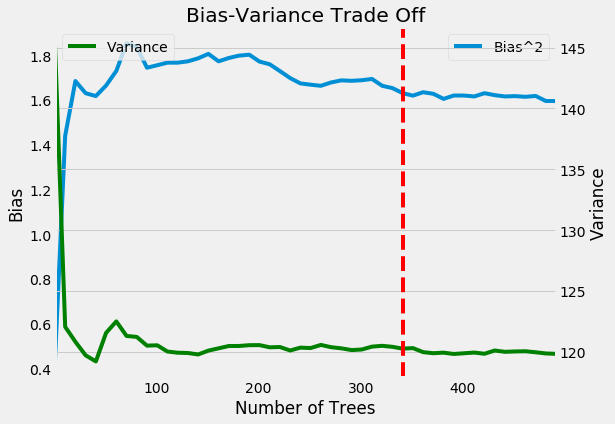

In [0]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = df['Bias'].plot( label = 'Bias^2')
ax.set_ylabel("Bias")
ax.set_xlabel("Number of Trees")
ax.set_title("Bias-Variance Trade Off")
ax.legend(loc=2)


ax1 = df['Variance'].plot(secondary_y=True, style='g', label='Variance')
ax1.set_ylabel("Variance")
ax1.legend(loc=2)

plt.axvline(x=n_estimator[34],linestyle="--", color='red')

plt.show()

Random Forest are powerful algorithms because they can decrease the variance while keeping the low bias attribute of a decision tree. From the graph above, the variance decreases as more trees are added to random forest. Notice that when No. of trees is equal to 1 (i.e. one decision tree) the variance is high (145.35) but when the model adds 10 additional trees the variance decreases to 122.06. There is also small increase in bias (from 0.47 to 1.59) but the decrease in variance is much more substantial (from 145 to 122), making the predictive power of the model overall better. 


Note: although it's not shown above, the bias and variance being to increase as the n_estimator approachs 5000 trees. Indicating that increasing the n_estimator doesn't always result in better results. 


Let's now visualize the loss function of the model. 

Text(0.5, 1.0, 'Mean Squared Error vs No. of Trees')

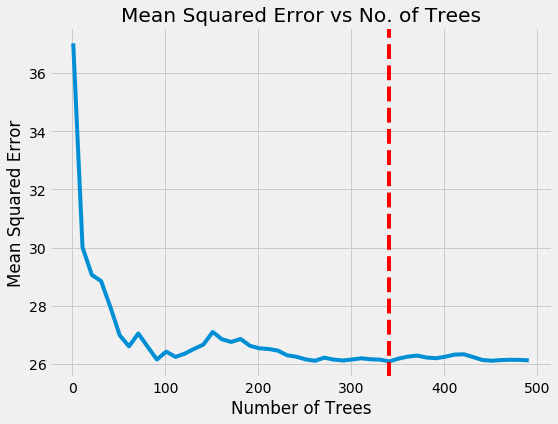

In [0]:
plt.figure(figsize=(8,6))
plt.plot(n_estimator, loss_avg)
plt.axvline(x=n_estimator[34],linestyle="--", color='red')
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs No. of Trees")

As expected MSE decreases as the number of trees increase. This is because the model is averaging the predictions over the n, number of trees. Thus the error from each decision tree is being averaged thus decreasing the MSE of the entire model. Note, however that for this particular example the MSE increases as we increase the number of trees approaches 5000. Although an increase in the error function isn't always the case, it depends on the problem. 

In [0]:
# determining the accuracy of the optimal n_estimator model (which corresponds to the lowest error)
index  = np.argmin(loss_avg)
regressor = RandomForestRegressor(n_estimators=n_estimator[index], random_state=0, oob_score = False)
rf = regressor.fit(X_train, y_train) 

y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

print("Training Accuracy Score =",rf.score(X_train, y_train)*100)
print("Test Accuracy Score =", rf.score(X_test, y_test)*100)

Training Accuracy Score = 97.20454652037593
Test Accuracy Score = 83.32942534304317


# Random Forest For Classifcation 

Building a random forest classification model using the diabetets dataset. 

Since it's a classifcation problem, we'll use log_loss as the loss function

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

bias_clf = []
var_clf = []
loss_clf = []
n_estimator = np.arange(1,500, 10)
for n in n_estimator:
    classifier = RandomForestClassifier(n_estimators=n, random_state=0, oob_score = False)
    cf = classifier.fit(X_train, y_train) 
    y_pred = cf.predict(X_test)
    bias_clf= np.append(bias_clf, my_bias(y_pred,y_test))
    var_clf = np.append(var_clf, my_variance(y_pred))
    loss_clf = np.append(loss_clf, (log_loss(y_test,y_pred)))

In [0]:
df_clf = pd.DataFrame({'Bias':np.array(bias_clf), 'Variance':np.array(var_clf), 'loss': np.array(loss_clf)}, index = np.array(n_estimator))

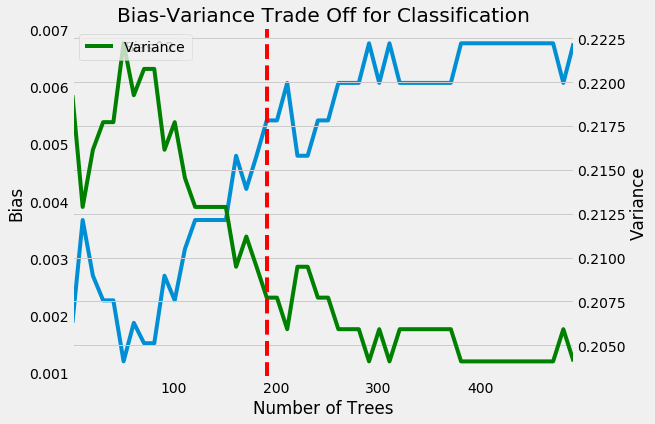

In [0]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = df_clf['Bias'].plot( label = 'Bias^2')
ax.set_ylabel("Bias")
ax.set_xlabel("Number of Trees")
ax.set_title("Bias-Variance Trade Off for Classification")
ax.legend(loc=2)


ax1 = df_clf['Variance'].plot(secondary_y=True, style='g', label='Variance')
ax1.set_ylabel("Variance")
ax1.legend(loc=2)

plt.axvline(x=n_estimator[19],linestyle="--", color='red')
plt.show()

Similar to the example above the variance decreases as the size of the random forest increases. The increase in bias is minimal compared to the decrease in variance. 

Text(0.5, 1.0, 'log-loss vs No. of Trees')

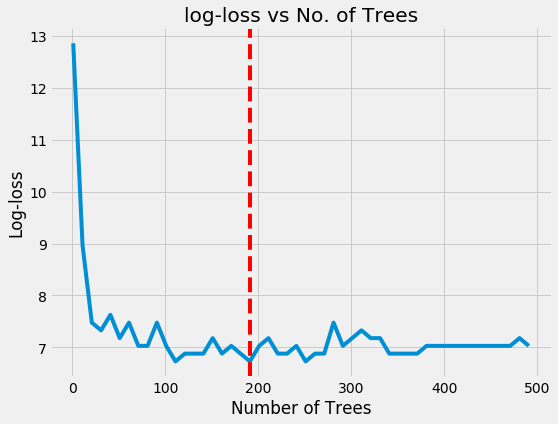

In [0]:
plt.figure(figsize=(8,6))
plt.plot(n_estimator, loss_clf)
plt.axvline(x=n_estimator[19],linestyle="--", color='red')
plt.xlabel("Number of Trees")
plt.ylabel("Log-loss")
plt.title("log-loss vs No. of Trees")

In [0]:
index  = np.argmin(loss_clf)
classifier = RandomForestClassifier(n_estimators=n_estimator[index], random_state=0)
cf = classifier.fit(X_train, y_train) 

y_pred = cf.predict(X_test)
y_train_pred = cf.predict(X_train)

print("Training Accuracy Score =", accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy Score =", accuracy_score(y_test, y_pred)*100)

Training Accuracy Score = 100.0
Test Accuracy Score = 80.51948051948052
